In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_excel('clustering.xlsx')
data

,No,Kota,Jumlah Penduduk (juta jiwa),Luas Wilayah (km²),Tingkat Pengangguran (%),PDRB per Kapita (juta rupiah)
0,1,Jakarta,10.5,662,7.5,200
1,2,Surabaya,2.9,350,6.0,150
2,3,Bandung,2.5,167,7.0,120
3,4,Medan,2.4,265,5.8,110
4,5,Makassar,1.5,199,5.0,100
5,6,Semarang,1.7,373,5.3,130
6,7,Yogyakarta,0.4,32,4.8,90
7,8,Palembang,1.6,400,6.5,105
8,9,Denpasar,0.9,127,4.0,140
9,10,Balikpapan,0.7,503,5.2,160


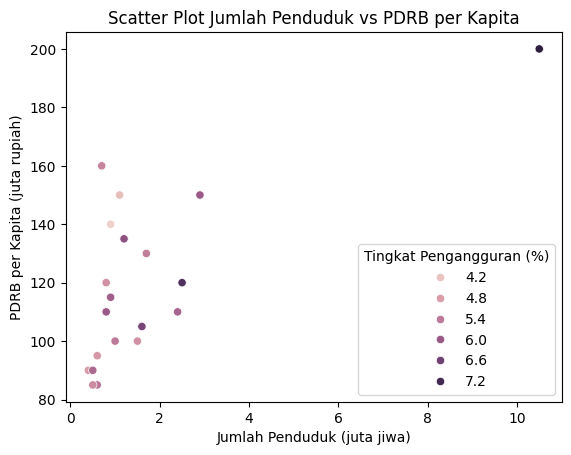

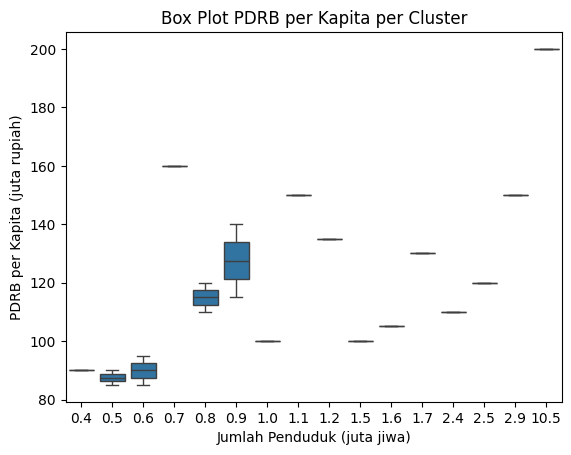

                  No                                          \
               count  mean std   min   25%   50%   75%   max   
Kota                                                           
Balikpapan       1.0  10.0 NaN  10.0  10.0  10.0  10.0  10.0   
Bandar Lampung   1.0  19.0 NaN  19.0  19.0  19.0  19.0  19.0   
Bandung          1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   
Banjarmasin      1.0  11.0 NaN  11.0  11.0  11.0  11.0  11.0   
Batam            1.0  13.0 NaN  13.0  13.0  13.0  13.0  13.0   
Denpasar         1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0   
Jakarta          1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   
Makassar         1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0   
Malang           1.0  14.0 NaN  14.0  14.0  14.0  14.0  14.0   
Manado           1.0  17.0 NaN  17.0  17.0  17.0  17.0  17.0   
Mataram          1.0  20.0 NaN  20.0  20.0  20.0  20.0  20.0   
Medan            1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0   
Padang           1.0  18.0 NaN  18.0  18

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi scatter plot
sns.scatterplot(x='Jumlah Penduduk (juta jiwa)', y='PDRB per Kapita (juta rupiah)', hue='Tingkat Pengangguran (%)', data=data)
plt.title('Scatter Plot Jumlah Penduduk vs PDRB per Kapita')
plt.show()

# Visualisasi box plot
sns.boxplot(x='Jumlah Penduduk (juta jiwa)', y='PDRB per Kapita (juta rupiah)', data=data)
plt.title('Box Plot PDRB per Kapita per Cluster')
plt.show()

# Analisis deskriptif
print(data.groupby('Kota').describe())

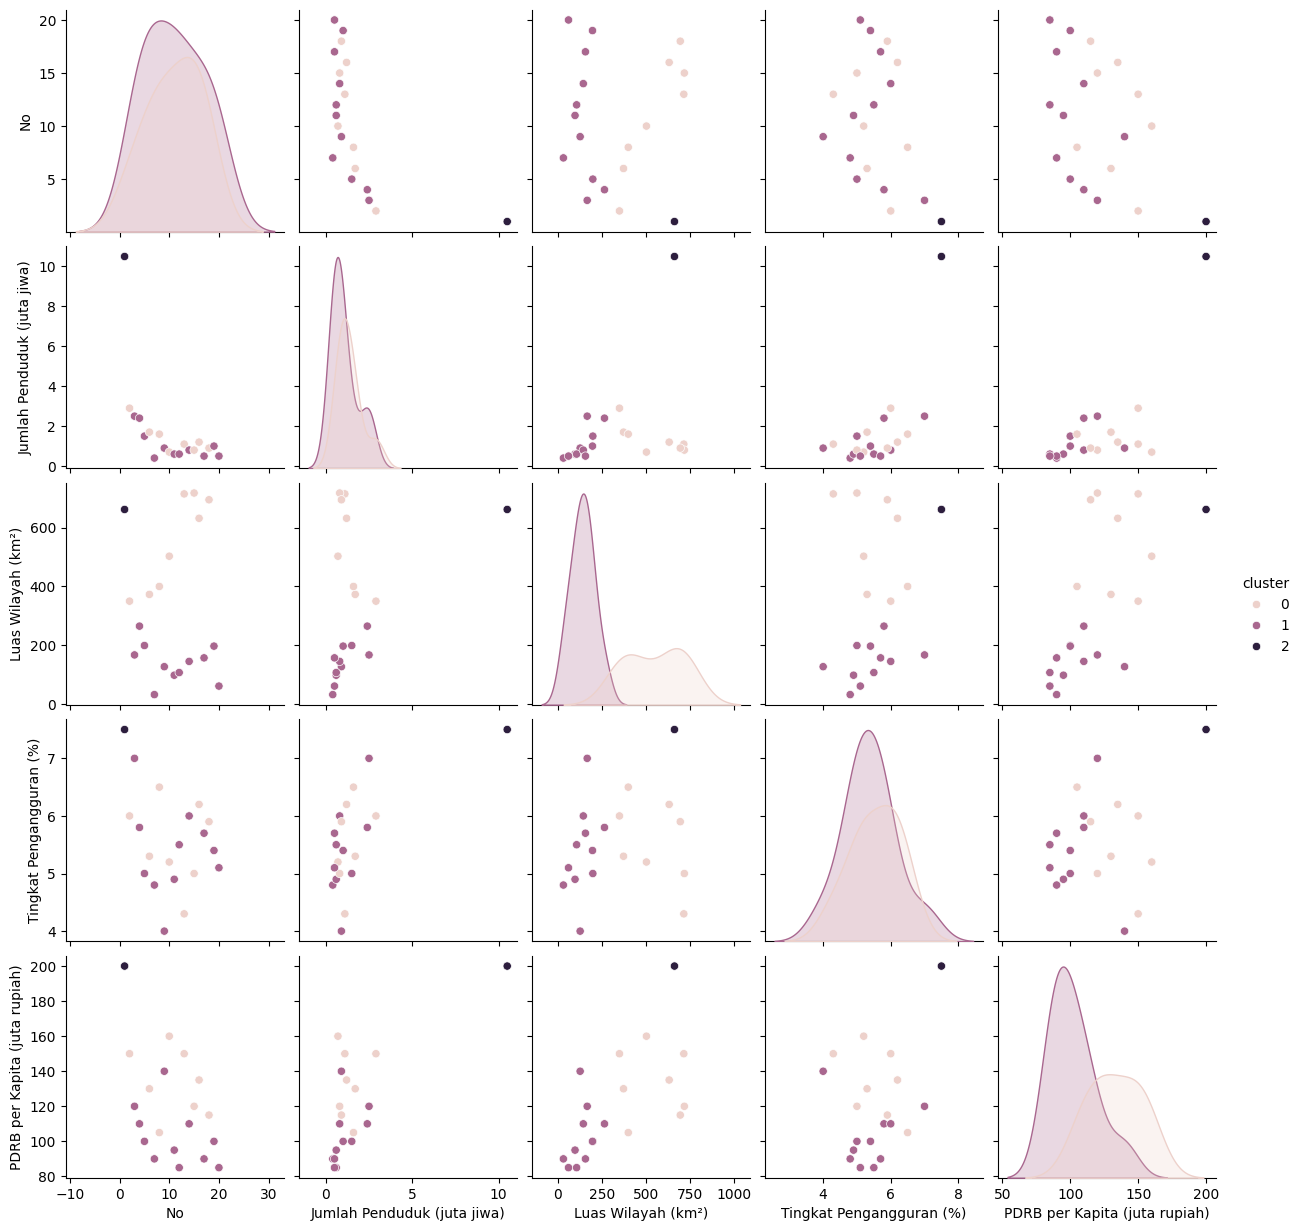

Silhouette Coefficient: 0.4048067282359442


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_excel('clustering.xlsx')

# Pilih fitur yang relevan
features = ['Jumlah Penduduk (juta jiwa)', 'Luas Wilayah (km²)', 'Tingkat Pengangguran (%)', 'PDRB per Kapita (juta rupiah)']
X = data[features]

# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan label cluster ke dataset
data['cluster'] = kmeans.labels_

# Visualisasi
sns.pairplot(data, hue='cluster')
plt.show()

# Evaluasi
print("Silhouette Coefficient:", metrics.silhouette_score(X_scaled, kmeans.labels_))